# Autor: Jesús Ernesto Carro Martínez

## Ejercicio 1: El fractal de Newton

(Ejercicio tomado de un curso de David P. Sanders)

Este ejercicio tiene dos objetivos. Que implementen el método de Newton para una variable (real o compleja) para buscar ceros de una función $f(x)$ dando *también* su derivada, y que construyan un fractal usándolo.

Recordemos primero qué es el método de Newton (o Newton-Raphson) en una variable, para encontrar las raíces (ceros) de una función no lineal $f(x)$. El método de Newton es un método iterativo definido por:

$$
x_{n+1}=x_n−\frac{f(x_n)}{f′(x_n)}\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot\cdot (1)
$$

a partir de una *condición inicial* $x_0$ dada. (Cualquier libro de cálculo 1 es buena referencia para la construcción.) Lo importante es que $x_{n+1}$, se construye a partir del anterior, usando la función $f(x)$ (cuyas raíces queremos encontrar) y *también* su derivada $f'(x)$. 

El *teorema* dice que si $x_0$ está suficientemente cerca de $x^*$, donde $f(x^*)=0$, entonces $x_n \to x^*$ cuando $n\to\infty$.

1. Implementen una función para encontrar las raíces de una función arbitraria $f(x)$. En particular, consideren $f(x) = x^2 - 2$. (Para escribir $f'(x)$ con caracteres Unicode, simplemente escriba `f\prime<TAB>`.) *HINT:* Como a priori no sabemos si la condición inicial conviene o no, vale la pena poner un tope superior al número de iteraciones del método de Newton.

2. Usa el método de Newton para encontrar las raíces cúbicas de 1, o sea, $g(z) = z^3-1$. Empezando con una malla de condiciones iniciales $z_0$ (en el plano complejo), determina a donde converge cada condición inicial. Guarden los resultados en una matriz: $N_{i,j} = z_{end}(z_0)$, donde $(i,j)$ identifican el punto en la malla. (Algo importante es que en Julia las matrices se almacenan corriendo sobre los renglones, es decir, primero se almacena la primer columna, luego la segunda, etc. Saber esto puede hacer que logren hacer correr las cosas de manera *eficiente*.)

3. Grafiquen los resultados usando `imshow`, `pcolor` y/o `pcolormesh` definidos en `PyPlot`; lean la documentación para ver cómo usar la instrucción que ustedes elijan.

4. ¿Qué modificaciones puedes hacer para hacer ampliaciones? Haz un par de ejemplos. ¿Tiene sentido el uso de la palbra "fractal"?

(Pueden experimentar también con otras funciones complejas, otros polinomios, o `sin`.)

---

### Respuesta:

Para dar solución a este ejercicio es necesario emplear PyPlot, lo llamamos:

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using Interact

Con lo anterior en mano podemos pasar a definir las funciones que serán de utilidad para realizar este trabajo. La ecuación de recurrencia para el método de Newton (1) nos invita a encontrar primero la derivada de la función `f` para después calcular las raíces de nuestra función, para lo cual simplemente copiaremos la función definida en el Ejercicio 4 de la serie anterior. Se tendrá:

In [3]:
function derivada(f,x)
    h=1
    x=big(x)
    epsilon=1e-6# Esta épsilon nos será de gran ayuda para estudiar la convergencia
    # de la derivada como función de h.
    # dif(h) es la función derivada que depende de h.
    dif(h)=(f(x+h)-f(x-h))/2h
    #Revisar la diferencia entre tu derivada y la derivada anterior
    while abs(dif(h)-dif(10h))>epsilon # Aquí se está iterando hasta que la derivada sea lo más exacta posible
        # pero sin llegar a observar el comportamiento "sorprendente" discutido en la tarea anterior.
        h=h/10# Se divide sobre 10 para hacer h más y más chiquita.
    end
    float64(dif(h))# El resultado se presenta en formato de flotante-64 (mayor excatitud).
end

derivada (generic function with 1 method)

Okey, tenemos la derivada. Paso siguiente es realizar la iteración de Newton en base a la ecuación (1) y usando la función derivada definida previamente. Tal función de iteración parará después de 1000 repeticiones, ésto se puede cambiar dependiendo del deseo del usuario.

In [4]:
function Newton(funcion,derivada,aprox,stop=1000)# La iteración solicita la función, su derivada se calcula
    # con la función derivada, aprox corresponde a un punto inicial dado por el usuario y el tope de repeticiones.
    n=0# El contador
    eps=1e-10# El épsilon nos permite asegurar una buena convergencia del resultado obtenido y el real.
    while abs(funcion(aprox))>eps && n<stop# Los dos límites para realizar la iteración.
        n+=1# Se va sumando al contado 1 por cada iteración.
        aprox=aprox-(funcion(aprox)/derivada(funcion,aprox))# Ecuación (1)
    end
    if abs(funcion(aprox))>eps# Debemos comprobar si la suposición es adecuada, es decir si el valor de aprox dado
        # al inicio fue correcto, pues si al terminar de iterar no nos acercamos a la raíz entones conviene cambiar
        # aprox.
        println("Máximo número de iteraciones realizadas. Introduzca otro valor para el punto aproximado.")
    else
        aprox# Se regresa aprox, lo que nos interesa!!
    end
end

Newton (generic function with 2 methods)

Calculemos las raíces de la primera función que se nos da:

In [5]:
f1(x)=x^2-2

f1 (generic function with 1 method)

Calculamos la raíces empleando las funciones anteriores:

In [6]:
Raices1=[Newton(f1,derivada,1.0),Newton(f1,derivada,-1.0)]# Las raices se colocarán en un arreglo
# y el punto inicial se asume en 1.0 y -1.0

2-element Array{Float64,1}:
  1.41421
 -1.41421

Podrán preguntarse: ¿Nos estará engañando? Comprobemos si realmente es raíz de f1:

In [7]:
Comprobacion1=[f1(x) for x in Raices1]

2-element Array{Any,1}:
 4.51061e-12
 4.51061e-12

Y aquí queda al criterio de cada quien. Sin embargo, sólo queda recalcar que éste resultado depende del número de iteraciones (stop) y del épsilon empleados en la función Newton.

Pasemos al siguiente ejercicio, se tendrá la función:

In [7]:
f2(z)=z^3-1

f2 (generic function with 1 method)

De igual forma procedemos a calcular las raíces:

In [9]:
Raices2=[Newton(f2,derivada,+im),Newton(f2,derivada,1.0),Newton(f2,derivada,-1.0-im)]# Los puntos iniciales... 
# bueno, claramente es una suposición.

3-element Array{Complex{Float64},1}:
 -0.5+0.866025im
  1.0+0.0im     
 -0.5-0.866025im

Comprobemos si realmente son raíces:

In [10]:
Comprobacion2=[f2(x) for x in Raices2]

3-element Array{Any,1}:
 2.22045e-16-1.11022e-16im 
                  0.0+0.0im
 5.95746e-13+5.02709e-13im 

Queda para el usuario juzgar los resultados.

Lo siguiente es realizar una matriz que contenga el resultado de aplicar el método de Newton a una función `f` para cada número complejo en una región cuadrada alrededor de $z=0$ del plano complejo. Para ello debemos contruir primero la malla de número complejos, para lograrlo se realiza una malla de números reales usando linspace y después se construirá una malla de números complejos usando la primer malla. Finalmente, se combinarán los números.

In [8]:
function MatrizNewton(funcion,espaciado,n)# Se pide la función de la cual se obtendrán sus raíces
    # se pide el espaciado y el número de puntos de la malla
    real=linspace(-espaciado,espaciado,n)# Malla de números reales.
    complex=-im*real# Malla de números complejos.
    Mat=[Newton(funcion,derivada,i+j) for i in complex, j in real]# Se emplea la función de Newton definida
    # previamente y la matriz se realiza para cada punto de la malla de números reales y complejos.
end

MatrizNewton (generic function with 1 method)

Y toca observar la gráfica, recuérdese que el tiempo en que graficará dependerá del número de puntos que se introduzcan; el espaciado de la función MatrizNewton, así como del stop y épsilon de Newton. Para graficar se empleará la función imshow.

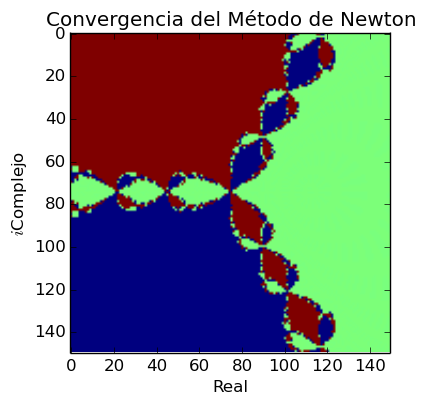

PyObject <matplotlib.text.Text object at 0xb5d165cc>

In [12]:
figure(figsize=(5,4))
imshow(imag(MatrizNewton(f2,2,150)))
xlabel("Real")
ylabel(L"$i$Complejo")
title("Convergencia del Método de Newton")

La imagen que observamos anteriormente la podemos relacionar con los resultados obtenidos previamente:

1. Las zonas de color nos indican las regiones de convergencia; es decir, todos los puntos en el plano $\mathbb{C}$ que se encuentren en la zona de color verde convergen a la raíz real $z_1=1.0$. Los puntos en la zona de color azul convergen a la raíz $z_2=-0.5-0.866025\,i$ mientras que los puntos en la zona de color rojo convergen a la raíz $z_3=-0.5+0.866025im\,i$.

1. Por otro lado, las fronteras de estas regiones son de tipo fractal!!! Sin embargo, si tomamos puntos en las fronteras, es difícil predecir a qué valor convergerán.

A continuación se presentan otros ejemplos:

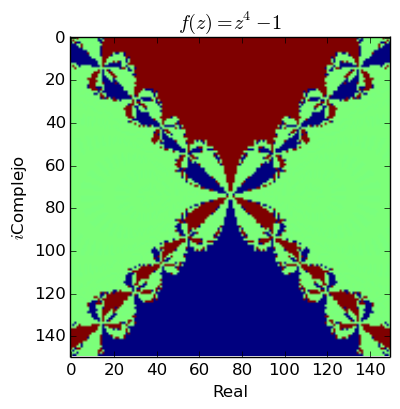

PyObject <matplotlib.text.Text object at 0xb5e0daac>

In [33]:
f3(z)=z^4-1
figure(figsize=(5,4))
imshow(imag(MatrizNewton(f3,2,150)))
xlabel("Real")
ylabel(L"$i$Complejo")
title(L"$f(z)=z^4-1$")

En el caso anterior se tienen cuatro regiones que corresponden a las cuatro raíces de dicha función, las cuales son:

In [14]:
Raices3=[Newton(f3,derivada,+im),Newton(f3,derivada,1.0),Newton(f3,derivada,-im),Newton(f3,derivada,-1.0)]
# Los puntos iniciales... 
# bueno, claramente es una suposición.

4-element Array{Complex{Float64},1}:
  0.0+1.0im
  1.0+0.0im
  0.0-1.0im
 -1.0+0.0im

La pregunta que se nos plantea es: ¿Tiene sentido el uso de la palabra fractal? Para contestar a tal pregunta debemos tener en claro que es un fractal: Un fractal es un objeto geométrico cuya estructura básica, fragmentada o irregular, se repite a diferentes escalas.

En las figuras presentadas anteriormente se puede observar tal comportamiento, una estructura básica se repite desde lo mas pequeño hasta hacerse más grande. Por tanto, observando las figuras podemos decir que el uso de la palabra fractal tiene sentido en este ejercicio.

Este trabajo se realizó en base a un trabajo de Eduardo Ibarra García Padilla, estudiante de física de la Facultad de Ciencias de la UNAM. Su GitHub se puede encontrar en este link.

## Ejercicio 2: Operadores como funciones

- ¿Qué pasa si sumas dos cadenas (*strings*)?

- ¿Qué pasa si multiplicas dos cadenas (*strings*)?

- Contruye una función *específica* que sume dos cadenas

---

### Respuesta:

Respondamos a la primera pregunta, podemos ver que al realizar la suma de dos cadenas se tiene:

In [15]:
"ayudenme"+"muero"

LoadError: `+` has no method matching +(::ASCIIString, ::ASCIIString)
while loading In[15], in expression starting on line 1

Es decir, observamos que al realizar la suma de dos cadenas el pograma nos marca error, nos dice que para tales argumentos no está definido el método de suma, lo cual ya sabemos de las clases.

Sin embargo, al realizar la multiplicación se tiene:

In [16]:
"ayudenme"*"muero"

"ayudenmemuero"

Por tanto, para el producto de dos cadenas sí se tiene un resultado, ésto quiere decir que las cadenas tienen el método producto definido.

Lo siguiente es construir una función que sólo sume dos cadenas, para ello debemos agregar tal método para las cadenas, lo realizaremos usando lo visto en la clase. Recurriendo al archivo [2-IntrodJulia-3](https://github.com/lbenet/2016-1_TemasSelectosFisComp/blob/master/2-IntrodJulia-3.ipynb):

In [17]:
# Lo primero sirve para *no* sobreescribir el operador `+` arbitrariamente
import Base.+

# ... y aquí se implementa la nueva función
+(a::ASCIIString, b::ASCIIString) = a*" "*b

+ (generic function with 145 methods)

Veamos los resultados de nuestra operación:

In [18]:
"ayudenme"+"muero"

"ayudenme muero"

Ahora la suma concatena dos palabras, es diferente a la operación de producto pero se hace uso de ésta.

## Ejercicio 3: Diferenciación automática

En clase vimos cómo definir estructuras "tipo" (*types*), y los conceptos básicos atrás de los `Duales` que sirven para implementar la diferenciación automática. 

El objetido de este ejercicio es que construyan un *módulo* (*llamado AutDiff en un archivo llamado AutDiff.jl*) que permita calcular primeras derivadas de manera más exacta que permita la computadora, o sea, que el error sea del orden del *epsilon* local de la máquina.

1. Define el tipo (estructura) `Dual` (**con exactamente ese nombre**) que contenga dos campos, el valor de la función y el valor de su derivada. Haz que *ambos* campos tengan el mismo tipo de valor, y que ambos *tengan* que ser un subtipo de `Real`.

- Define métodos para que el dual de un número (sólo *un* número) sea lo que uno espera, y una función `dual_var(x0)` que retorne un dual que represente a la variable *independiente* en `x0`.

- Define métodos que sumen, resten, multipliquen y dividan duales, y números con duales. Incluye los casos (para duales) en que los operadores `+` y `-` actúan sólo sobre un `Dual`.

- Incluye extensiones de las funciones elementales más usuales (`^`, `exp`, `log`, `sin`, `cos`, `sqrt`, etc).

- Muestra que el error numérico de lo que has hecho es esencialmente el epsilon de la máquina. Para esto define alguna función $f(x)$ y aplícala sobre `x = dual_var(x0)`, y muestra que el error es del orden del epsilon de la máquina al rededor del valor verdadero de la derivada.

- Extiende la función para el método de Newton para que funcione sólo dando la función, y que la derivada la obtenga usando las herramientas del módulo.


---

### Respuesta:

Con el módulo contruido pasaremos a comprobar que nuestro programa cumple con los puntos indicados en el Ejercicio, vayamos paso a paso: empezamos por llamar al módulo.

In [9]:
using AutDiff

Comprobemos que el dual de un sólo número se defina como el dual de una variable, ésto es:

In [10]:
[Dual(1.0),Dual(1),Dual(π/2)]

3-element Array{Dual{Float64},1}:
 Dual{Float64}(1.0,1.0)               
 Dual{Float64}(1.0,1.0)               
 Dual{Float64}(1.5707963267948966,1.0)

De lo anterior podemos ver que el dual de un sólo número $x$ nos devuelve $\vec{x}=(x,1)$, y lo hace para cualquier subtipo de número real, justo como solicita el enunciado.

Además, se nos pedía definir una función `dual_var` que devolviese la variable en forma dual:

In [11]:
[dual_var(1.0),dual_var(1),dual_var(π)]

3-element Array{Dual{Float64},1}:
 Dual{Float64}(1.0,1.0)              
 Dual{Float64}(1.0,1.0)              
 Dual{Float64}(3.141592653589793,1.0)

Cumple con lo esperado. Ahora debemos comprobar que la suma y resta de duales sean correctas:

In [12]:
[-Dual(1.0),Dual(3.0)+Dual(2.0),Dual(π)-Dual(2*π),+Dual(2.0),Dual(π)-Dual(2)+Dual(2.0,0.0),Dual(3.0)+1]

6-element Array{Dual{Float64},1}:
 Dual{Float64}(-1.0,-1.0)             
 Dual{Float64}(5.0,2.0)               
 Dual{Float64}(-3.141592653589793,0.0)
 Dual{Float64}(2.0,1.0)               
 Dual{Float64}(3.141592653589793,0.0) 
 Dual{Float64}(4.0,1.0)               

Podemos ver que la suma y resta cumplen con lo esperado. Ahora, qué pasa con la división y multiplicación:

In [10]:
[Dual(1.0)*Dual(3.0),Dual(1.0)/Dual(π),(Dual(1.0)/Dual(π))*Dual(2.0)*4.0,2.0*Dual(2.0),2.0/Dual(3.0)]

5-element Array{Dual{Float64},1}:
 Dual{Float64}(3.0,4.0)                              
 Dual{Float64}(0.3183098861837907,0.2169887025414529)
 Dual{Float64}(2.5464790894703255,3.009149165066786) 
 Dual{Float64}(4.0,2.0)                              
 Dual{Float64}(0.6666666666666666,0.2222222222222222)

Podemos ver que realiza las operaciones inclusive con constantes.

**Observación: Si se desea introducir una constante, sólamente se debe colocar como tal, sin hacer referencia a los Duales.**

Podemos ver que las funciones básicas están cargadas:

In [11]:
[cos(Dual(π)),sin(Dual(0)),(Dual(3.0))^(2),exp(Dual(7.5)),log(Dual(1.0))]

5-element Array{Dual{Float64},1}:
 Dual{Float64}(-1.0,-1.2246467991473532e-16)         
 Dual{Float64}(0.0,1.0)                              
 Dual{Float64}(9.0,6.0)                              
 Dual{Float64}(1808.0424144560632,1808.0424144560632)
 Dual{Float64}(0.0,1.0)                              

Donde al aplicar una función $f$ sobre un Dual nos devuelve un Dual de dos entradas, en la primera se tiene la función evaluada en tal punto $f(x)$ y la segunda corresponde a evaluar $f'(x)$, en tal punto. 

Lo siguiente es comprobar que el error numérico de calcular la derivada con el método de diferenciación automática es del orden del épsilon de la máquina, para ello realizaremos una función llamada `comparacion`.

In [13]:
function comparacion(f,df,x)# f es la función a derivar, df es su derivada real y x es el punto donde se desea
    # evaluar la derivada.
    realdiff = df(x)# El valor de la derivada real se calcula y guarda en realdiff
    autdiff = f(dual_var(x)).y# EL valor dado por la diferenciación automática.
    compara = abs(realdiff-autdiff)# En esta función se guarda el error entre la derivada real y la obtenida
    # por diferenciación automática.
    println("La diferencia entre derivada real y la calculada con AutDiff es: \n",compara)
    println("El épsilon del valor de la derivada real es: \n", eps(realdiff))# Se devuelve 
    #el épsilon de realdiff y el error.
end

comparacion (generic function with 1 method)

Realicemos algunos ejemplos, para los cuales nos vemos en la necesidad de calcular la derivada manualmente. La primera función.

In [13]:
f4(x)=(x^2)*log(x)

f4 (generic function with 1 method)

Su derivada es:

In [14]:
df4(x)=(2x*log(x))+x

df4 (generic function with 1 method)

Usamos la función comparación:

In [15]:
comparacion(f4,df4,1.95)

La diferencia entre derivada real y la calculada con AutDiff es: 
0.0
El épsilon del valor de la derivada real es: 
8.881784197001252e-16


Sorprendente!! Podemos observar que la diferencia es cero!! No es necesario comparar con el épsilon de la máquina para el resultado de la derivada real. Pasemos a otros ejemplos:

In [16]:
f5(x)=exp(x)*sin(x)
f6(x)=exp(cos(sin(x)))
f7(x)=(x^(2/3))*exp(sin(x))

f7 (generic function with 1 method)

Su derivada es:

In [17]:
df5(x)=exp(x)*sin(x)+exp(x)*cos(x)
df6(x)=-exp(cos(sin(x)))*sin(sin(x))*cos(x)
df7(x)=(2/3)*(x^(-1/3))*exp(sin(x))+(x^(2/3))*exp(sin(x))*cos(x)

df7 (generic function with 1 method)

In [18]:
comparacion(f5,df5,π/4)

La diferencia entre derivada real y la calculada con AutDiff es: 
0.0
El épsilon del valor de la derivada real es: 
4.440892098500626e-16


In [19]:
comparacion(f6,df6,π/3)

La diferencia entre derivada real y la calculada con AutDiff es: 
1.1102230246251565e-16
El épsilon del valor de la derivada real es: 
1.1102230246251565e-16


In [20]:
comparacion(f7,df7,2.578)

La diferencia entre derivada real y la calculada con AutDiff es: 
0.0
El épsilon del valor de la derivada real es: 
2.220446049250313e-16


Impresionante!! Podemos jugar con los valores que se introducen; pero, sin importar cual sea, la diferencia entre el valor real y el calculado con AutDiff es menor o igual al épsilon de la máquina para el valor real. Por tanto, podemos decir que la diferenciación automática es una forma muy efectiva de calcular la derivada de alguna función en un punto dado.

Lo último que queda es adaptar lo que tenemos para usarlo en el método de Newton, para lo cual nos conviene definir la siguiente función:

In [15]:
function D(f,x)
    x_Dual = dual_var(x)
    DualRes = f(x_Dual)
    return f(x_Dual).y
end

D (generic function with 1 method)

La cual calcula la derivada de una función $f$ en un punto dado $x$ usando las herramientas del módulo y podemos usarla en la función Newton definida en el Ejercicio 1 para calcular las raíces de `f1` y `f2`.

In [16]:
Raices1a=[Newton(f1,D,1.0),Newton(f1,D,-1.0)]# Las raices se colocarán en un arreglo
# y el punto inicial se asume en 1.0 y -1.0

2-element Array{Float64,1}:
  1.41421
 -1.41421

Confimamos si realmente son las ráices:

In [29]:
Comprobacion1a=[f1(x) for x in Raices1a]

2-element Array{Any,1}:
 4.51061e-12
 4.51061e-12

Sin embargo, si nosotros quisiéramos emplear esta la función D para obtener las raíces complejas de una función, nos marcaría un error, ésto es:

In [17]:
Raices2a=[Newton(f2,D,+im),Newton(f2,D,1.0),Newton(f2,D,-1.0-im)]# Los puntos iniciales... 
# bueno, claramente es una suposición.

LoadError: stack overflow
while loading In[17], in expression starting on line 1

Lo cual se debe a que los Duales del módulo AutDiff no están diseñados para recibir números complejos, por lo cual nos vemos en la necesidad de definir duales con entradas complejas, por tanto creamos un nuevo módulo: AutDiffC.

In [18]:
using AutDiffC

En este módulo simplemente se ha cambiado el tipo de los elementos de entrada a complejos y hemos llamado a estos nuevos duales como DualC, se tiene:

In [29]:
[DualC(im),DualC(π+im),DualC(1.0),DualC(5//3)+DualC(im),DualC(0.0)+im]

5-element Array{DualC{T<:Number},1}:
 DualC{Complex{Float64}}(0.0 + 1.0im,1.0 + 0.0im)               
 DualC{Complex{Float64}}(3.141592653589793 + 1.0im,1.0 + 0.0im) 
 DualC{Float64}(1.0,1.0)                                        
 DualC{Complex{Float64}}(1.6666666666666667 + 1.0im,2.0 + 0.0im)
 DualC{Complex{Float64}}(0.0 + 1.0im,1.0 + 0.0im)               

Y las operaciones antes definidas son las mismas y cumplen con lo antes visto. Ahora, redefinamos la función D que derive usando tales Duales:

In [21]:
function DC(f,x)
    x_Dual = dual_varC(x)
    DualRes = f(x_Dual)
    return f(x_Dual).y
end

DC (generic function with 1 method)

Con esta función podemos calcular las raíces de `f2`:

In [30]:
Raices2a=[Newton(f2,DC,+im),Newton(f2,DC,1.0),Newton(f2,DC,-1.0-im)]# Los puntos iniciales... 
# bueno, claramente es una suposición.

3-element Array{Complex{Float64},1}:
 -0.5+0.866025im
  1.0+0.0im     
 -0.5-0.866025im

In [31]:
Comprobacion2a=[f2(x) for x in Raices2a]

3-element Array{Any,1}:
 2.22045e-16-1.11022e-16im 
                  0.0+0.0im
 5.94857e-13+4.97713e-13im 

Con tal función para calcular derivadas es posible realizar las mismas gráficas del Ejercicio 1, sólo lo haremos para `f2`:

In [32]:
function MatrizNewtonA(funcion,espaciado,n)# Se pide la función de la cual se obtendrán sus raíces
    # se pide el espaciado y el número de puntos de la malla
    real=linspace(-espaciado,espaciado,n)# Malla de números reales.
    complex=-im*real# Malla de números complejos.
    MatA=[Newton(funcion,DC,i+j) for i in complex, j in real]# Se emplea la función de Newton definida
    # previamente y la matriz se realiza para cada punto de la malla de números reales y complejos.
end

MatrizNewtonA (generic function with 1 method)

Fue necesario redefinir la función que hace la matriz para que empleara la función DC. Ahora se procede a hacer la gráfica:

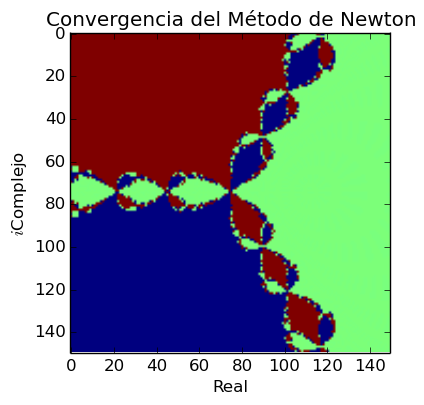

PyObject <matplotlib.text.Text object at 0xaa8055cc>

In [33]:
figure(figsize=(5,4))
imshow(imag(MatrizNewtonA(f2,2,150)))
xlabel("Real")
ylabel(L"$i$Complejo")
title("Convergencia del Método de Newton")

Obtuvimos la misma gráfica y de destacar es que lo hace mucho más rápido que lo hacía la función `derivada` del Ejercicio 1. De hecho, gracias a la diferenciación automática he logrado realizar el siguiente fractal (con la función del Ejercicio 1, se quedaba corriendo todo el día):

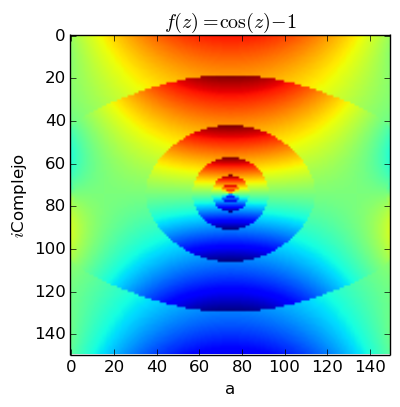

PyObject <matplotlib.text.Text object at 0xa9f25d0c>

In [38]:
fF(z)=cos(z)-1
figure(figsize=(5,4))
imshow(imag(MatrizNewtonA(fF,2,150)))
xlabel("a")
ylabel(L"$i$Complejo")
title(L"$f(z)=\cos(z)-1$")

Otro ejemplo para gozar:

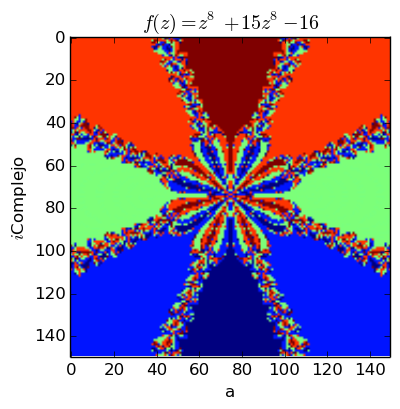

PyObject <matplotlib.text.Text object at 0xa97c20cc>

In [47]:
fF(z)=(z^8+15z^8-16)
figure(figsize=(5,4))
imshow(imag(MatrizNewtonA(fF,2,150)))
xlabel("a")
ylabel(L"$i$Complejo")
title(L"$f(z)=z^8+15z^8-16$")

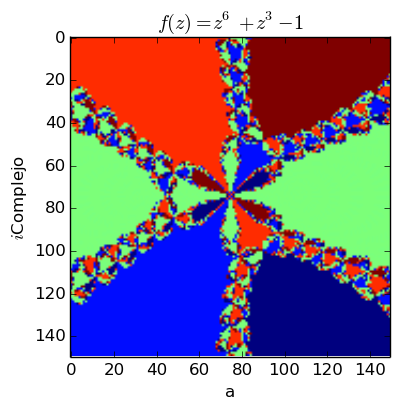

PyObject <matplotlib.text.Text object at 0xa96da52c>

In [49]:
fF(z)=z^6+z^3-1
figure(figsize=(5,4))
imshow(imag(MatrizNewtonA(fF,2,150)))
xlabel("a")
ylabel(L"$i$Complejo")
title(L"$f(z)=z^6+z^3-1$")

### Materiales de ayuda

[Módulos en Julia](http://julia.readthedocs.org/en/latest/manual/modules/)